In [18]:
import cv2
import matplotlib.pyplot as plt
import numpy
from sklearn.cluster import KMeans

In [9]:
image_path = "../output_videos/cropped_image.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

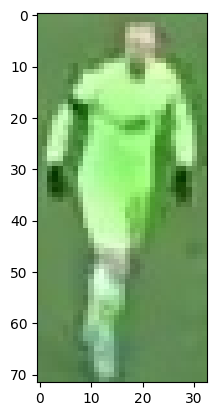

In [10]:
plt.imshow(image)

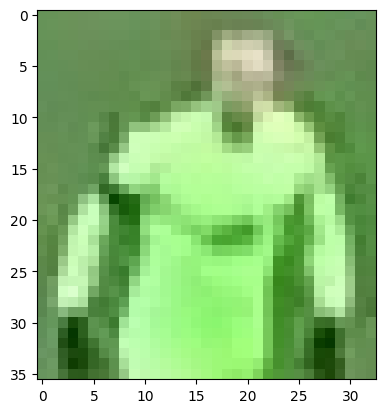

In [13]:
# top half of image
top_half_image = image[0: int(image.shape[0]/2), :]
plt.imshow(top_half_image)
plt.show()

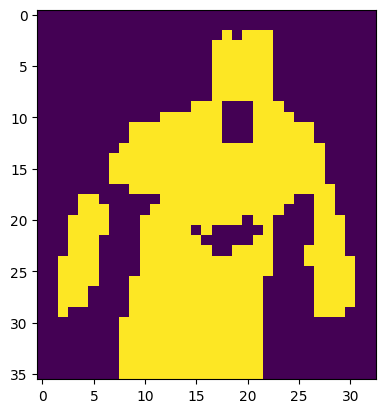

In [26]:
#cluster the image into two clusters so reshape image into a 2d array

image_2d = top_half_image.reshape(-1, 3)

#perform k means clustering with 2 clusters
kmeans = KMeans(n_clusters = 2, random_state=0).fit(image_2d)

#get cluster labels 
labels = kmeans.labels_

#reshape it again to be a image (orginal)
clustered_image = labels.reshape(top_half_image.shape[0], image.shape[1])

#display the clustered image
plt.imshow(clustered_image)
plt.show()

In [24]:
corner_clusters = [clustered_image[0, 0], clustered_image[0, -1], clustered_image[-1, 0], clustered_image[-1, -1]]
non_player_cluster = max(set(corner_clusters), key=corner_clusters.count)
print(non_player_cluster)

0


In [28]:
player_cluster = 1-non_player_cluster
print(player_cluster)

1


In [29]:
kmeans.cluster_centers_[player_cluster]

array([172.93927126, 237.9534413 , 147.76720648])